In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Spring 2024/Hydrogeology/OwensVaSnowWt.csv")
station_df = pd.read_csv("/content/drive/MyDrive/Spring 2024/Hydrogeology/CDEC_Stations(2).csv")

In [ ]:
df['DATE TIME'] = pd.to_datetime(df['DATE TIME'])
df['Year'] = df['DATE TIME'].dt.year
df = df.groupby(['STATION_ID', 'Year'])['VALUE'].mean().reset_index()
merged_df = pd.merge(df, station_df, left_on='STATION_ID', right_on='STA')
merged_df.drop(columns=["STA",'Station Name','Nearby City','Hydro #','Owner','Maintenance','Operator','Map #','Collect #',"County Name",'Agency Name',"Hydro Area","Sensors"])

,STATION_ID,Year,VALUE,Elevation,Latitude,Longitude,Basin #,Basin Name
0,BIP,1949,7.6,8400,37.238,-118.597,11001,OWENS RIVER
1,BIP,1950,0.0,8400,37.238,-118.597,11001,OWENS RIVER
2,BIP,1951,0.0,8400,37.238,-118.597,11001,OWENS RIVER
3,BIP,1954,4.8,8400,37.238,-118.597,11001,OWENS RIVER
4,BIP,1955,4.8,8400,37.238,-118.597,11001,OWENS RIVER
...,...,...,...,...,...,...,...,...
1712,VDM,2000,NaN,9500,36.758,-118.410,9401,KINGS RIVER
1713,VDM,2001,NaN,9500,36.758,-118.410,9401,KINGS RIVER
1714,VDM,2002,NaN,9500,36.758,-118.410,9401,KINGS RIVER
1715,VDM,2003,NaN,9500,36.758,-118.410,9401,KINGS RIVER


In [ ]:
merged_df.head()

,STATION_ID,Year,VALUE,STA,Station Name,Elevation,Latitude,Longitude,Nearby City,Hydro #,...,Owner,Maintenance,Operator,Map #,Collect #,County Name,Basin Name,Agency Name,Hydro Area,Sensors
0,BIP,1949,7.6,BIP,BISHOP PARK,8400,37.238,-118.597,BISHOP,9,...,999,999,999,26,0,INYO,OWENS RIVER,.None Specified,SOUTH LAHONTAN,"3,18,82"
1,BIP,1950,0.0,BIP,BISHOP PARK,8400,37.238,-118.597,BISHOP,9,...,999,999,999,26,0,INYO,OWENS RIVER,.None Specified,SOUTH LAHONTAN,"3,18,82"
2,BIP,1951,0.0,BIP,BISHOP PARK,8400,37.238,-118.597,BISHOP,9,...,999,999,999,26,0,INYO,OWENS RIVER,.None Specified,SOUTH LAHONTAN,"3,18,82"
3,BIP,1954,4.8,BIP,BISHOP PARK,8400,37.238,-118.597,BISHOP,9,...,999,999,999,26,0,INYO,OWENS RIVER,.None Specified,SOUTH LAHONTAN,"3,18,82"
4,BIP,1955,4.8,BIP,BISHOP PARK,8400,37.238,-118.597,BISHOP,9,...,999,999,999,26,0,INYO,OWENS RIVER,.None Specified,SOUTH LAHONTAN,"3,18,82"


In [ ]:
merged_df.to_csv('data.csv', index=False)

In [ ]:
df.head()

,STATION_ID,Year,VALUE
0,BIP,1949,7.6
1,BIP,1950,0.0
2,BIP,1951,0.0
3,BIP,1954,4.8
4,BIP,1955,4.8


AttributeError: module 'matplotlib' has no attribute 'title'

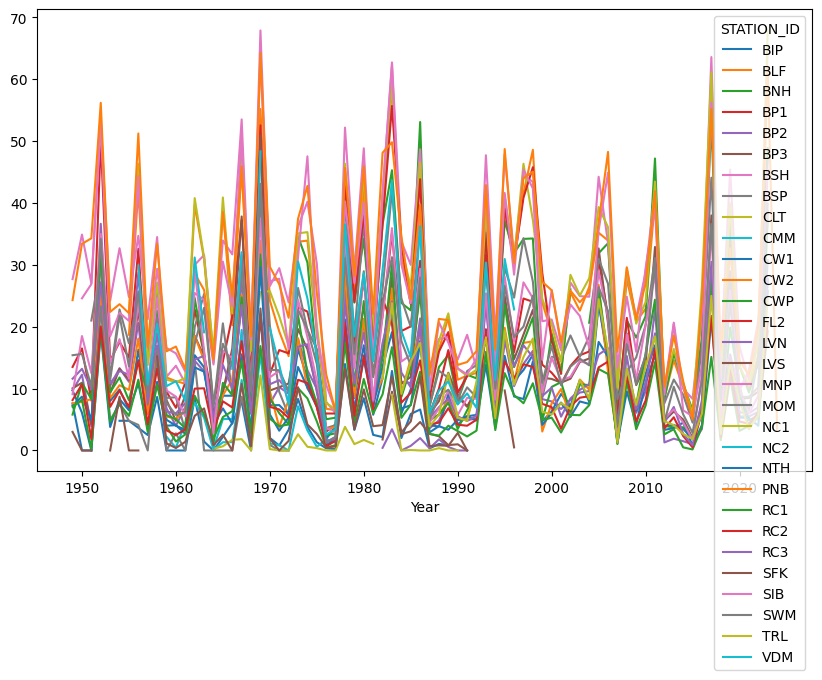

In [ ]:


# Convert 'Date' column to datetime


# Pivot the DataFrame so that each station has its own column
pivot_df = df.pivot(index='Year', columns='STATION_ID', values='VALUE')
#pivot_df['VALUE'] = pivot_df['VALUE'].interpolate()

# Plot the data
pivot_df.plot(figsize=(10, 6))
plt.title('Results of Different Stations Over Time')
plt.xlabel('Date')
plt.ylabel('Result')
plt.grid(True)
plt.legend(title='Station')
plt.show()
